<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

In [2]:
!pip install osmnx geopy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 1.7 MB/s eta 0:00:00


In [43]:
import geopandas
import matplotlib.pyplot as plt
import osmnx as ox
import seaborn as sns
from shapely.geometry import Point, LineString

sns.set_style(style="dark")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 🕸 Street network

In [44]:
PLACE_NAME = "Vila de Gracia, Barcelona, Spain"
graph = osmnx.graph_from_place(PLACE_NAME)

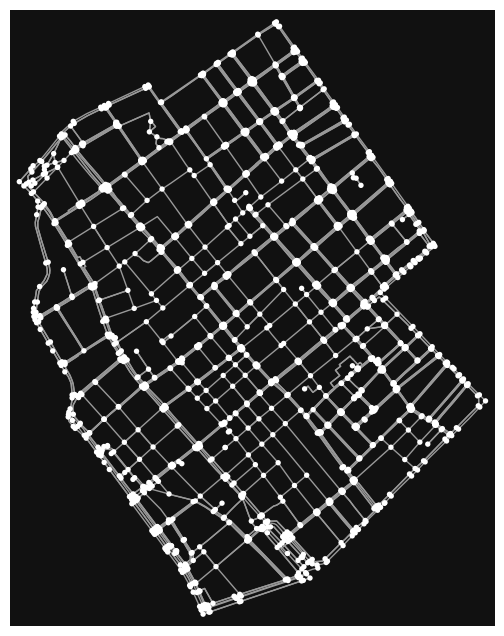

In [45]:
# showing our street network

figure, ax = osmnx.plot_graph(graph)

### 🕍 Building footprints

We can retrieve places information as well (buildings, parks, amenities etc). The data that we retrieve is a dataframe, like the ones we worked with during the previous term:

In [46]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)

buildings.head()

<ipython-input-46-25295188f309>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = osmnx.geometries_from_place(


addr:city addr:housenumber addr:postcode addr:street  \
element_type osmid                                                             
node         4675120818       NaN              NaN         08012         NaN   
             5485540653       NaN              NaN           NaN         NaN   
             5485540654       NaN              NaN           NaN         NaN   
             5485540655       NaN              NaN           NaN         NaN   
             5485540656       NaN              NaN           NaN         NaN   

                        amenity entrance  \
element_type osmid                         
node         4675120818     NaN      NaN   
             5485540653     NaN      NaN   
             5485540654     NaN      NaN   
             5485540655     NaN      NaN   
             5485540656     NaN      NaN   

                                                            name  \
element_type osmid                                                 
node         4675120818  Refugi Antiaeri de la Plaça del Diamant   
             5485540653                                      NaN   
             5485540654                                      NaN   
             5485540655                                      NaN   
             5485540656                                      NaN   

                                phone                  geometry addr:country  \
element_type osmid                                                             
node         4675120818  +34932196134  POINT (2.15606 41.40407)          NaN   
             5485540653           NaN  POINT (2.15342 41.39904)          NaN   
             5485540654           NaN  POINT (2.15315 41.39911)          NaN   
             5485540655           NaN  POINT (2.15272 41.39968)          NaN   
             5485540656           NaN  POINT (2.15295 41.39929)          NaN   

                         ...  dog elevator pets ways type construction  \
element_type osmid       ...                                             
node         4675120818  ...  NaN      NaN  NaN  NaN  NaN          NaN   
             5485540653  ...  NaN      NaN  NaN  NaN  NaN          NaN   
             5485540654  ...  NaN      NaN  NaN  NaN  NaN          NaN   
             5485540655  ...  NaN      NaN  NaN  NaN  NaN          NaN   
             5485540656  ...  NaN      NaN  NaN  NaN  NaN          NaN   

                        residential community_centre:for service_times  \
element_type osmid                                                       
node         4675120818         NaN                  NaN           NaN   
             5485540653         NaN                  NaN           NaN   
             5485540654         NaN                  NaN           NaN   
             5485540655         NaN                  NaN           NaN   
             5485540656         NaN                  NaN           NaN   

                        castle_type  
element_type osmid                   
node         4675120818         NaN  
             5485540653         NaN  
             5485540654         NaN  
             5485540655         NaN  
             5485540656         NaN  

[5 rows x 124 columns]

<Axes: >

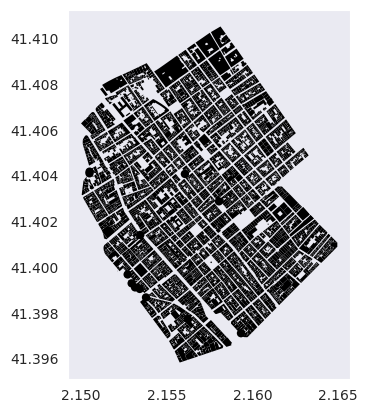

In [47]:
buildings.plot(color="black", edgecolor="none")

### 🍽 Other data extraction

There is a lot more data that can be extracted, like parks, amenities and more! See the entire list [here](https://wiki.openstreetmap.org/wiki/Map_features).

In [21]:
tree = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "natural": "tree"
    }
)
tree.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-21-5713cc20860e>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  tree = osmnx.geometries_from_place(


natural  source source:date                  geometry  \
element_type osmid                                                              
node         1445371219    tree  survey    20110923  POINT (2.16080 41.40114)   
             1445371223    tree  survey    20110923  POINT (2.16091 41.40121)   
             1445371224    tree  survey    20110923  POINT (2.16094 41.40125)   
             1445371228    tree  survey    20110923  POINT (2.16074 41.40118)   
             1445371230    tree  survey    20110923  POINT (2.16148 41.40074)   

                        leaf_cycle leaf_type species species:ca description  \
element_type osmid                                                            
node         1445371219        NaN       NaN     NaN        NaN         NaN   
             1445371223        NaN       NaN     NaN        NaN         NaN   
             1445371224        NaN       NaN     NaN        NaN         NaN   
             1445371228        NaN       NaN     NaN        NaN         NaN   
             1445371230        NaN       NaN     NaN        NaN         NaN   

                        protected website denotation height diameter  \
element_type osmid                                                     
node         1445371219       NaN     NaN        NaN    NaN      NaN   
             1445371223       NaN     NaN        NaN    NaN      NaN   
             1445371224       NaN     NaN        NaN    NaN      NaN   
             1445371228       NaN     NaN        NaN    NaN      NaN   
             1445371230       NaN     NaN        NaN    NaN      NaN   

                        survey:date genus circumference diameter_crown  
element_type osmid                                                      
node         1445371219         NaN   NaN           NaN            NaN  
             1445371223         NaN   NaN           NaN            NaN  
             1445371224         NaN   NaN           NaN            NaN  
             1445371228         NaN   NaN           NaN            NaN  
             1445371230         NaN   NaN           NaN            NaN

In [39]:
park = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "leisure": "park"
    }
)
park.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-39-958c58207fa0>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  park = osmnx.geometries_from_place(


geometry  \
element_type osmid                                                           
way          296835349   POLYGON ((2.15358 41.40796, 2.15371 41.40782, ...   
             431135518   POLYGON ((2.15689 41.40605, 2.15685 41.40610, ...   
             1056835780  POLYGON ((2.15819 41.40572, 2.15844 41.40586, ...   

                                                                     nodes  \
element_type osmid                                                           
way          296835349   [3006519982, 3006533615, 3006519983, 300775576...   
             431135518   [4303837346, 7551821586, 7551821588, 430383734...   
             1056835780  [9710972622, 9710972621, 9710972620, 971097261...   

                        leisure                         name  \
element_type osmid                                             
way          296835349     park  Jardins del Mestre Balcells   
             431135518     park   Jardins de Manuel Torrente   
             1056835780    park            Jardí de l'alzina   

                                             name:ca name:etymology:wikidata  \
element_type osmid                                                             
way          296835349   Jardins del Mestre Balcells                     NaN   
             431135518                           NaN                Q6752912   
             1056835780            Jardí de l'alzina                     NaN   

                        wheelchair  
element_type osmid                  
way          296835349         NaN  
             431135518         yes  
             1056835780        NaN

In [41]:
playground = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "leisure": "playground"
    }
)
playground.head()

<ipython-input-41-2829e75f4cba>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  playground = osmnx.geometries_from_place(


access     leisure  \
element_type osmid                           
node         4360036904    yes  playground   
             4771772859    yes  playground   
             7551821587    yes  playground   
             8658803046    yes  playground   
way          86681367      yes  playground   

                                                                  geometry  \
element_type osmid                                                           
node         4360036904                           POINT (2.15356 41.40454)   
             4771772859                           POINT (2.15091 41.40724)   
             7551821587                           POINT (2.15710 41.40633)   
             8658803046                           POINT (2.15367 41.40437)   
way          86681367    POLYGON ((2.15588 41.40425, 2.15582 41.40422, ...   

                        barrier  \
element_type osmid                
node         4360036904     NaN   
             4771772859     NaN   
             7551821587     NaN   
             8658803046     NaN   
way          86681367     fence   

                                                                     nodes  \
element_type osmid                                                           
node         4360036904                                                NaN   
             4771772859                                                NaN   
             7551821587                                                NaN   
             8658803046                                                NaN   
way          86681367    [1008166713, 1008166720, 1008166727, 100816673...   

                        area surface wheelchair fence_type height source  \
element_type osmid                                                         
node         4360036904  NaN     NaN        NaN        NaN    NaN    NaN   
             4771772859  NaN     NaN        NaN        NaN    NaN    NaN   
             7551821587  NaN     NaN        NaN        NaN    NaN    NaN   
             8658803046  NaN     NaN        NaN        NaN    NaN    NaN   
way          86681367    yes     NaN        NaN        NaN    NaN    NaN   

                        source:date operator playground:theme  
element_type osmid                                             
node         4360036904         NaN      NaN              NaN  
             4771772859         NaN      NaN              NaN  
             7551821587         NaN      NaN              NaN  
             8658803046         NaN      NaN              NaN  
way          86681367           NaN      NaN              NaN

### 🎢 Putting it all together in one map

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


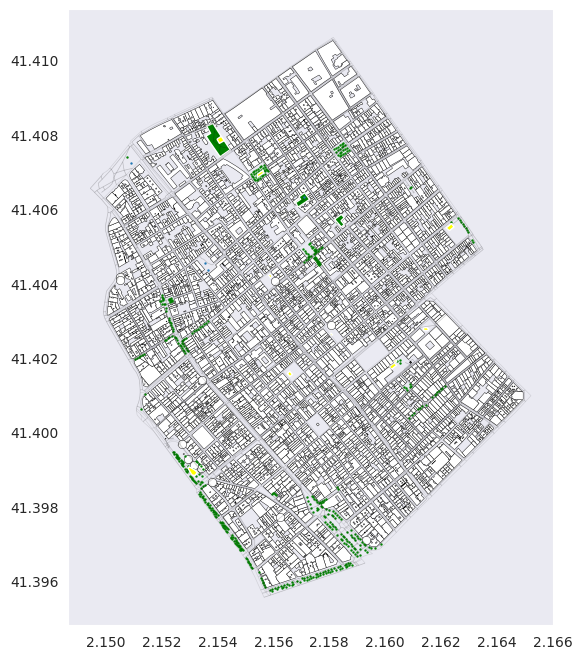

In [42]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="white",  edgecolor="black", linewidth=0.3)



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=0.5, edgecolor="black", alpha=0.1)

# Plot trees
tree.plot(ax=ax, facecolor="green", markersize=0.5)

# Plot parks
park.plot(ax=ax, facecolor="green", markersize=0.5)

# Plot playground
playground.plot(ax=ax, facecolor="yellow", markersize=0.5)
plt.show()

### 📍Mapping our own place

There are several ways to map our place on the map:

1. placing a point when we know the exact coordinates
2. finding place's coordinates via [geocoding](https://nominatim.org/)

#### 📍Placing a point by its coordinates

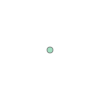

In [97]:
coords = (2.155909, 41.402815)
p = Point(coords)
p

In [98]:
print(p.x, p.y)

2.155909 41.402815


In [99]:
geom = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)

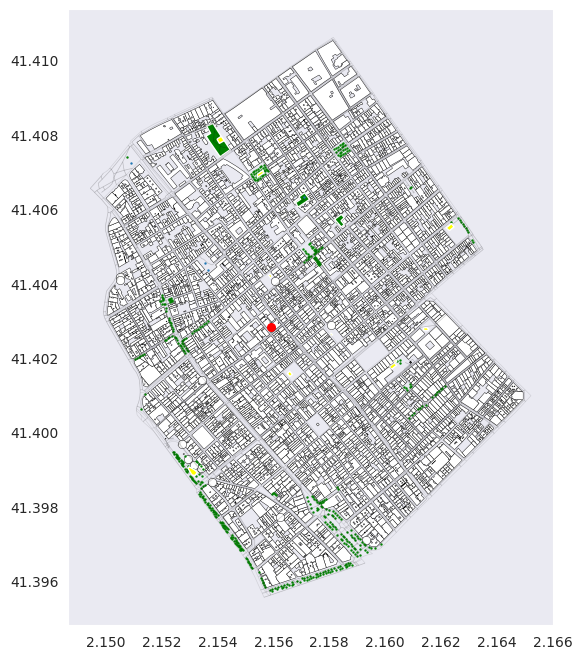

In [100]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="white",  edgecolor="black", linewidth=0.3)

# Plot starting point
geom.plot(ax=ax, facecolor="red", markersize=30)

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=0.5, edgecolor="black", alpha=0.1)

# Plot trees
tree.plot(ax=ax, facecolor="green", markersize=0.5)

# Plot parks
park.plot(ax=ax, facecolor="green", markersize=0.5)

# Plot playfround
playground.plot(ax=ax, facecolor="yellow", markersize=0.5)
plt.show()


plt.show()

#### ㊙️ Geocoding: name to coordinates

In [101]:
our_place = "Teatre Lliure de Gràcia"  # "Teatre Lliure de Gràcia"
geocoded_addresses = geopandas.tools.geocode(
    [our_place],
    provider="nominatim",
    user_agent="autogis2023",
    timeout=10
)
geocoded_addresses.head()

geometry                                            address
0  POINT (2.15596 41.40272)  Lliure, 47, Carrer del Montseny, la Vila de Gr...

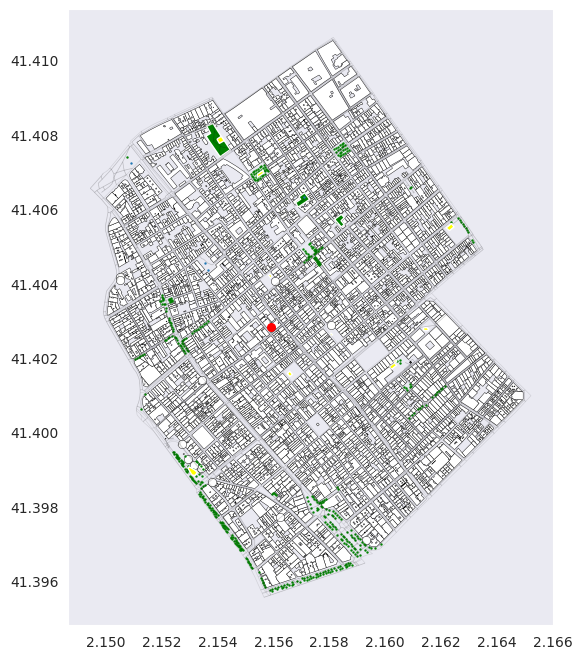

In [102]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="white",  edgecolor="black", linewidth=0.3)

# Plot starting point
geom.plot(ax=ax, facecolor="red", markersize=30)

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=0.5, edgecolor="black", alpha=0.1)

# Plot trees
tree.plot(ax=ax, facecolor="green", markersize=0.5)

# Plot parks
park.plot(ax=ax, facecolor="green", markersize=0.5)

# Plot playfround
playground.plot(ax=ax, facecolor="yellow", markersize=0.5)
plt.show()


plt.show()

### 📐 Geometrical operations

A list of possible geometrical operations can be found in [shapely documentation](https://shapely.readthedocs.io/en/stable/geometry.html).

Let's check how many restaurants lie within 4 minutes fast walk (0.5 km). 1km is around 0.008 degrees

In [103]:
rad = p.buffer(0.008 * 0.5)  # making offset of 1.5 km from our point of interest

rad = geopandas.GeoDataFrame(
    {
        "geometry": [rad],
    },
    crs=buildings.crs
)

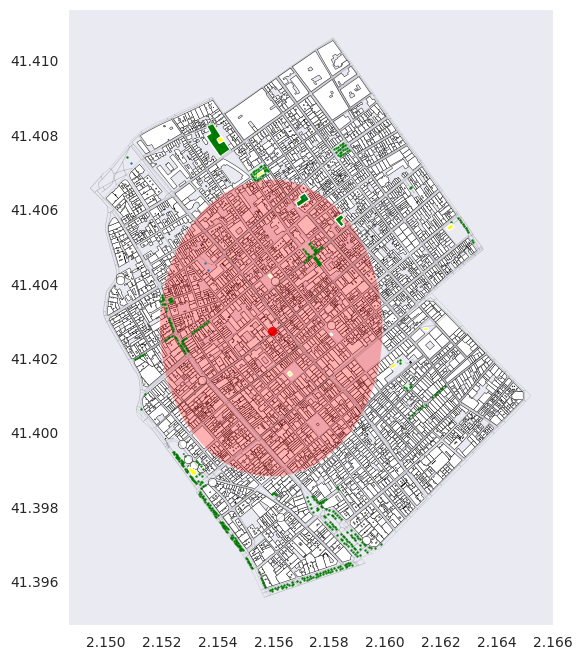

In [104]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="white",  edgecolor="black", linewidth=0.3)

# Plot starting point
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=30)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=0.5, edgecolor="black", alpha=0.1)

# Plot trees
tree.plot(ax=ax, facecolor="green", markersize=0.5)

# Plot parks
park.plot(ax=ax, facecolor="green", markersize=0.5)

# Plot playground
playground.plot(ax=ax, facecolor="yellow", markersize=0.5)
plt.show()


plt.show()

In [105]:
accessible_playground = [r for r in playground["geometry"] if isinstance(r, Point) and r.within(rad["geometry"][0])]
accessible_playground  = rad = geopandas.GeoDataFrame(
    {
        "geometry": accessible_playground,
    },
    crs=buildings.crs
)

In [109]:
accessible_playground

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geometry
0  POINT (2.15356 41.40454)
1  POINT (2.15710 41.40633)
2  POINT (2.15367 41.40437)

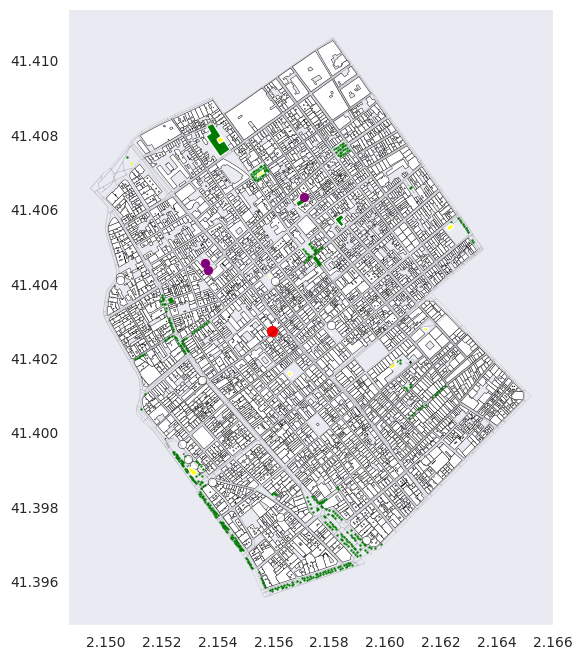

In [112]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="white",  edgecolor="black", linewidth=0.3)

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=0.5, edgecolor="black", alpha=0.1)

# Plot trees
tree.plot(ax=ax, color="green", markersize=0.5)

# Plot parks
park.plot(ax=ax, facecolor="green", markersize=0.5)

# Plot playground
playground.plot(ax=ax, color="yellow", markersize=0.5)

# Plot starting point
geocoded_addresses.plot(ax=ax, color="red", markersize=50)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

accessible_playground.plot(ax=ax, color="purple", markersize=30, alpha=1.0)

plt.show()

### 🕸 Network Analysis

With osmnx we can get statistics necessary for urban analysis within a defined area. Let's define our area as a polygon:

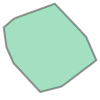

In [113]:
zone = edges.unary_union.convex_hull
zone

In [114]:
stats = osmnx.basic_stats(graph, area=zone.area)
stats

{'n': 1698,
 'm': 4616,
 'k_avg': 5.4369846878680805,
 'edge_length_total': 125913.56000000016,
 'edge_length_avg': 27.277634315424645,
 'streets_per_node_avg': 3.4210836277974086,
 'streets_per_node_counts': {0: 0, 1: 36, 2: 3, 3: 873, 4: 782, 5: 4},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.02120141342756184,
  2: 0.0017667844522968198,
  3: 0.5141342756183745,
  4: 0.46054181389870436,
  5: 0.002355712603062426},
 'intersection_count': 1662,
 'street_length_total': 79844.23300000017,
 'street_segment_count': 2828,
 'street_length_avg': 28.233462871287188,
 'circuity_avg': 1.0167060044445906,
 'self_loop_proportion': 0.0003536067892503536,
 'node_density_km': 11209942037118.838,
 'intersection_density_km': 10972275421490.877,
 'edge_density_km': 831262490746340.9,
 'street_density_km': 527119684292233.8}

What do these stats mean?

[Link](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.stats)

#### 〽️ Shortest route

In [119]:
origin = (
    osmnx.geocode_to_gdf("Plaça del Diamant")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Jardins del Mestre Balcells")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

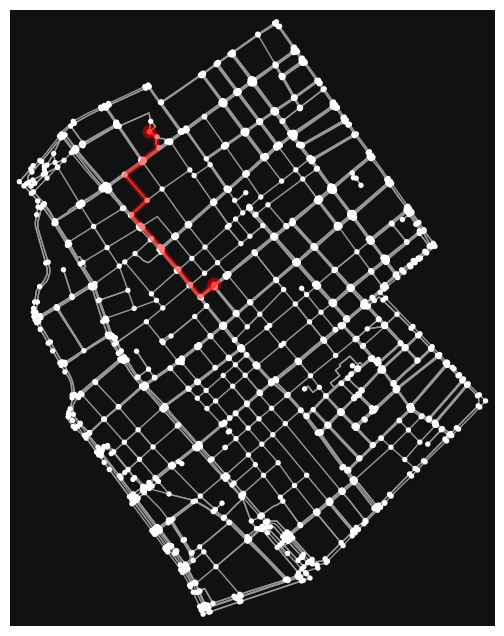

In [120]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)

# plotting the projection
fig, ax = osmnx.plot_graph_route(graph, route)

In [121]:
route_nodes = nodes.loc[route]
route_line = LineString(
    list(route_nodes.geometry.values)
)
route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom.length

<ipython-input-121-3f1016416ab9>:14: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  route_geom.length


0    0.007306
dtype: float64

### 🕸 Walkability analysis

How far can you reach from a place on foot?

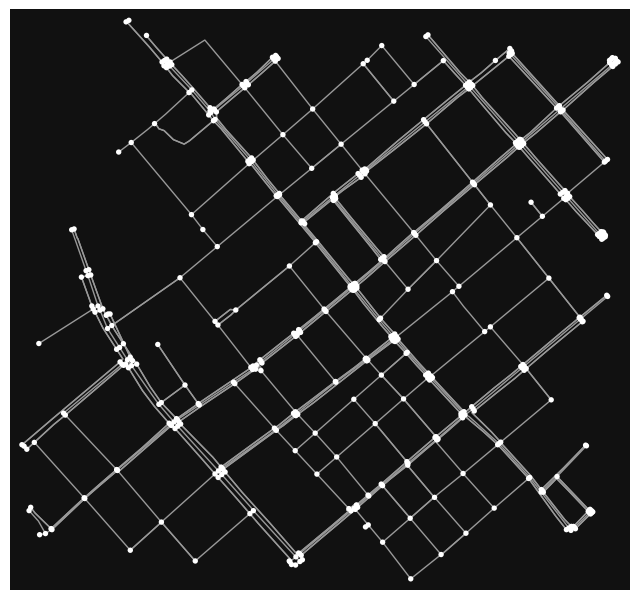

In [123]:
# getting jardins node from the graph:
jardins_node = osmnx.distance.nearest_nodes(graph, p.x, p.y, return_dist=False)

# cutting the graph to hold 1km distance from the node only:
g = osmnx.truncate.truncate_graph_dist(graph, jardins_node, max_dist=500)
figure, ax = osmnx.plot_graph(g)


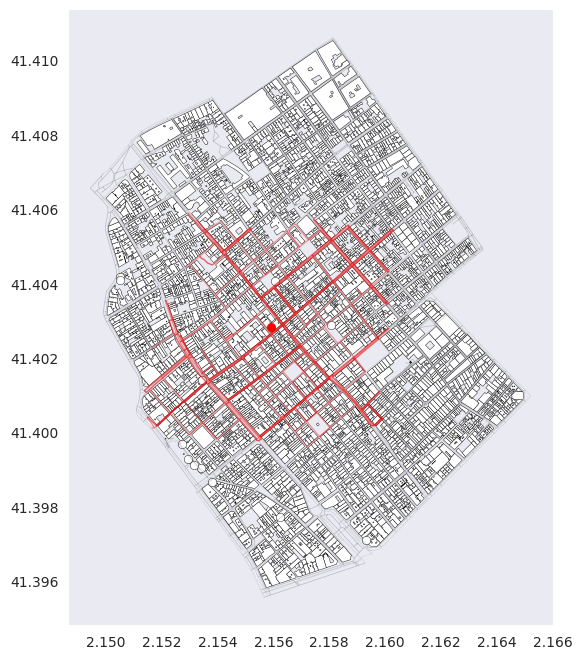

In [124]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="white",  edgecolor="black", linewidth=0.3)
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=0.5, edgecolor="black", alpha=0.1)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)
plt.show()

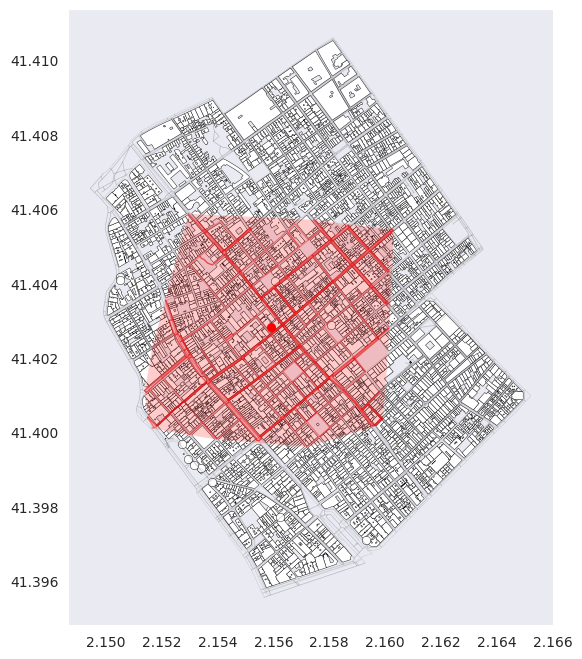

In [125]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="white",  edgecolor="black", linewidth=0.3)
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=0.5, edgecolor="black", alpha=0.1)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)

walkable_zone = edges1.unary_union.convex_hull

w_zone_mapped = geopandas.GeoDataFrame(
    {
        "geometry": [walkable_zone],
    },
    crs=buildings.crs
)

w_zone_mapped.plot(ax=ax, facecolor="red", alpha=0.2)


plt.show()

### 🧬 Resources

* [Downloading data for entire countries / continents](https://download.geofabrik.de/)
* [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html)
* [OSMNX](https://osmnx.readthedocs.io/en/stable/user-reference.html)
* [shapely](https://shapely.readthedocs.io/en/stable/geometry.html)

This notebook is based on the material from [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html) from [University of Helsinki](https://www.helsinki.fi/sv) by Henrikki Tenkanen, Vuokko Heikinheimo and Håvard Wallin Aagesen.

Materials taken from the course belong mostly to the [Lesson 3 Geocoding](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html) and [Lesson 6 Retrieving data from OSM and Network Analysis](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/overview.html). Material was adapted for the purposes of this course by changing the location in the example as well as adding calculation of walking distance from a given point.


Thanks to them for maintaining [the course repo](https://github.com/Automating-GIS-processes/site/) and improving the material from year to year.